<a href="https://colab.research.google.com/github/franciscoerramuspe/tensorflow_guide/blob/main/01_NN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What could be some regression problems?
* How much will this house sell for?
* How many people will buy this app?
* How much my health insurance would be?
* How much should I save each week for fuel?

A regression problem could be summarized as the problems that estimate the relationship between a dependent variable and one or more independent variables.
The most common form of regression analysis is **linear regression**.
In my study, we could say that the dependent variable is risk of injury, and the independent variables are hours of sleep, hours of training, number of calories eaten, etc.


# Intro to Regression with NNs

In [1]:
#Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


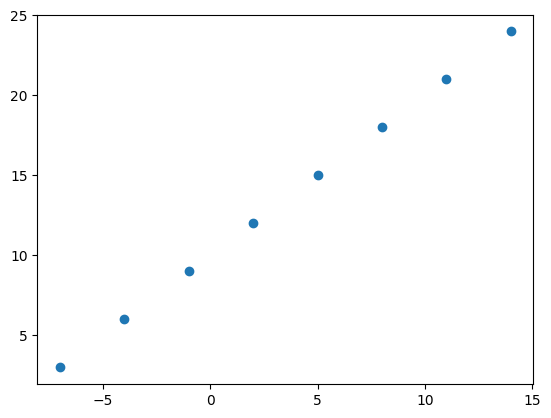

In [2]:
# Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# turn nunmpy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. **Creating a model** - define input and output layers
2. **compile a model** - define loss function (the function that tells the model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & Y (feature and labels)


In [8]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 882ms/step - loss: 7.6707 - mae: 7.6707
Epoch 2/5
1/1 [==============================] - 0s 25ms/step - loss: 7.5382 - mae: 7.5382
Epoch 3/5
1/1 [==============================] - 0s 24ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/5
1/1 [==============================] - 0s 31ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 7.4738 - mae: 7.4738


In [ ]:
# try and make a prediction using our model (what should be the value of y given an X)
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 221ms/step


array([[-7.375296]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** = Here we might add more layers, increase the number of hidden units (aka neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here, we might chance the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more date (give the mode on more examples to learn from)

*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.*

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

In [10]:
# check if models prediction improved
model.predict([17.0])

1/1 [==============================] - 0s 358ms/step


array([[29.596146]], dtype=float32)

### testing with .Adam() optimizer

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # adam optimizer
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

### testing with 100 hidden units

In [12]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # adam optimizer
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 480ms/step - loss: 12.0099 - mae: 12.0099
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.4604 - mae: 11.4604
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8972 - mae: 10.8972
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.3125 - mae: 10.3125
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7012 - mae: 9.7012
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.0580 - mae: 9.0580
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 8.3773 - mae: 8.3773
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6531 - mae: 7.6531
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8779 - mae: 6.8779
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.0452 - mae: 6.0452
Epoch 11/100
1/1 [==============================] - 0s 12ms/

In [13]:
# test model
model.predict([17.0])
# here, the model is overfitting (learning the data too well)
# and the mae produced during training is not a really valid representation of what is actually doing

1/1 [==============================] - 0s 115ms/step


array([[31.536247]], dtype=float32)

In [14]:
# another trial to improve our model

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # adam optimizer
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 645ms/step - loss: 13.7588 - mae: 13.7588
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2629 - mae: 13.2629
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7671 - mae: 12.7671
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2688 - mae: 12.2688
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7654 - mae: 11.7654
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2544 - mae: 11.2544
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.7330 - mae: 10.7330
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1987 - mae: 10.1987
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6486 - mae: 9.6486
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 9.0800 - mae: 9.0800
Epoch 11/100
1/1 [==============================] - 

In [15]:
# test model
model.predict([17.0])
# here, by changing the optimization function, we were able to improve the model

1/1 [==============================] - 0s 137ms/step


array([[29.801762]], dtype=float32)

In [19]:
#setting lr to 0.01
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # adam optimizer
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 825ms/step - loss: 15.0722 - mae: 15.0722
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3119 - mae: 14.3119
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5990 - mae: 13.5990
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8924 - mae: 12.8924
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1879 - mae: 12.1879
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4828 - mae: 11.4828
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.7750 - mae: 10.7750
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0620 - mae: 10.0620
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3411 - mae: 9.3411
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6095 - mae: 8.6095
Epoch 11/100
1/1 [==============================] - 0s 9

In [20]:
# test model
model.predict([17.0])
# here, by changing the learning rate we got the best prediction in our model
# leaning rate is usually the most important hiperparameter

1/1 [==============================] - 0s 70ms/step


array([[27.848545]], dtype=float32)